# Import 

In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error


import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

In [2]:
import seaborn as sns 

In [3]:
%matplotlib inline 

In [4]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

In [5]:
init_notebook_mode(connected=True)

In [6]:
cf.go_offline()

**Get The Stock Quote**

In [7]:
df = web.DataReader('aapl',data_source='yahoo',start='2012-01-01',end='2019-12-17')

Show the Data

In [8]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.591937
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.659609
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.800153
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.933968
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.913450
...,...,...,...,...,...,...
2019-12-11,67.775002,67.125000,67.202499,67.692497,78756800.0,66.701706
2019-12-12,68.139999,66.830002,66.945000,67.864998,137310400.0,66.871689
2019-12-13,68.824997,67.732498,67.864998,68.787498,133587600.0,67.780678


Data shape number,rows,and columns

In [9]:
df.shape

(2003, 6)

# Visualize  The Closing Price 

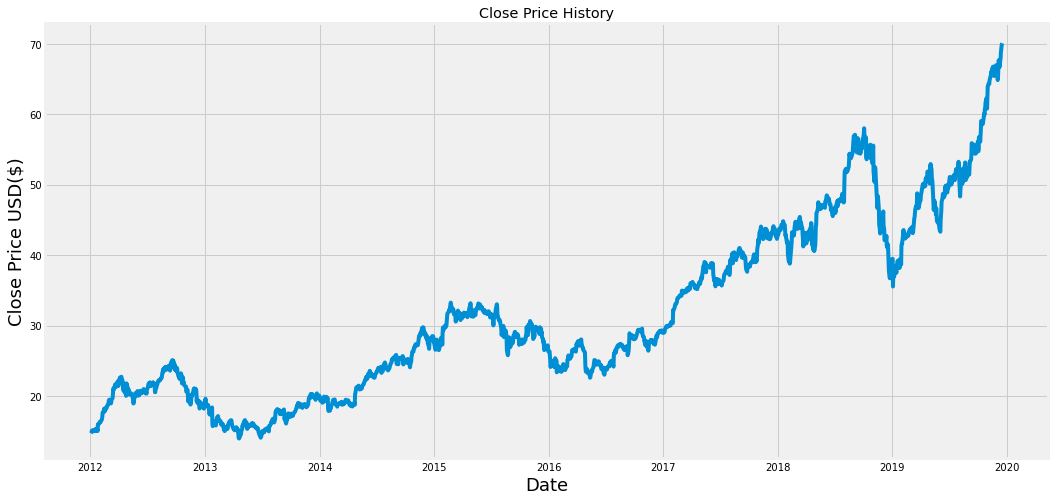

In [10]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.show()

<AxesSubplot:xlabel='Close', ylabel='count'>

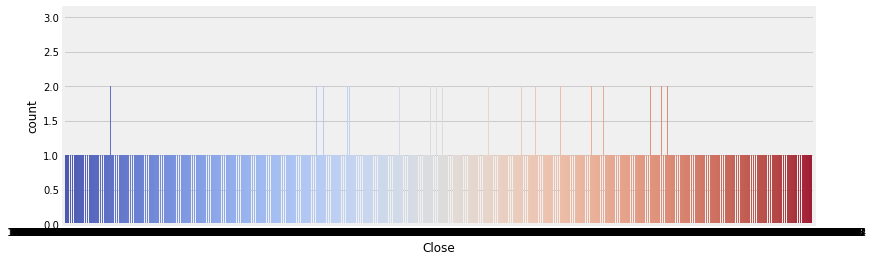

In [11]:
plt.figure(figsize=(12,4))
Close = sorted(df['Close'].unique())
sns.countplot(x='Close',data=df,palette='coolwarm' )

In [12]:
df.iplot(kind='scatter',x='High',y='Close',mode='markers',size=5,color='red')

In [13]:
df.iplot(kind='box')

In [14]:
df.iplot(kind='surface',colorscale='rdylbu')

Create a new dataframe with only the close column 

In [49]:
data = df.filter(['Close'])
#convert the dataframe to a numpy array
dataset = data.values

In [50]:
#get the number of row to train the model 
training_data_len = math.ceil(len(dataset)*.8)

In [51]:
training_data_len

1603

**Scale The Data**

In [52]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [53]:
scaled_data

array([[0.01316509],
       [0.01457063],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

**creating the training data set**

In [54]:
#create the scaled training Data set
train_data = scaled_data[0:training_data_len,:]

In [55]:
#split the data into X_train and Y_train Data Set 

In [56]:
X_train=[]
y_train=[]

for i in range (60,len(train_data)):
    X_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i <= 61:
        print(X_train)
        print(y_train)
        print()

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01893355, 0.02345548, 0.01900352,
       0.03569838, 0.03440732, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814049, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661394,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632778, 0.09835024, 0.10269409, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701237, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01

In [57]:
#convert the X_train and y_train to numpy array 

In [58]:
X_train , y_train = np.array(X_train),np.array(y_train)

In [59]:
#reshape the data 
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [60]:
#before dimension is 2D now the dimension after reshape the data become 3D , added 1 

In [61]:
X_train.shape

(1543, 60, 1)

**Build The LSTM Model**

In [70]:
model= Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [71]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

**Train the model**

In [75]:
model.fit(X_train,y_train,batch_size=1,epochs=1)

1543/1543 [==============================] - 22s 14ms/step - loss: 2.2700e-04


In [76]:
#create the testing data sets 
#create a new array containing scaled values from index 1543 to 2003 

In [78]:
test_data = scaled_data[training_data_len-60 : , :]

In [79]:
#create Datsets X_test and y_test


In [81]:
X_test =[]
y_test = dataset[training_data_len :,:]
for i in range (60,len(test_data)):
    X_test.append(test_data[i-60:i,0])

In [82]:
#convert the data to numpy array

In [83]:
X_test = np.array(X_test)

In [84]:
#Reshape the data for LSDM model we need 3D array 

In [85]:
X_test = np.reshape (X_test,(X_test.shape[0],X_test.shape[1],1))

In [86]:
#get the model predicted price values 

In [88]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

In [89]:
#evaluation of the model 

In [90]:
#Get the RMSE - root mean squared error 

In [91]:
rmse = np.sqrt(np.mean(predictions-y_test)**2)

In [92]:
rmse

0.9928381633758545

In [93]:
##Plot the data

In [113]:
train = data [:training_data_len]
valid = data[training_data_len:]
valid ['Predictions'] = predictions 

In [114]:
##Visualize the model Data 

ValueError: Unrecognized location 'lower right '. Valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center


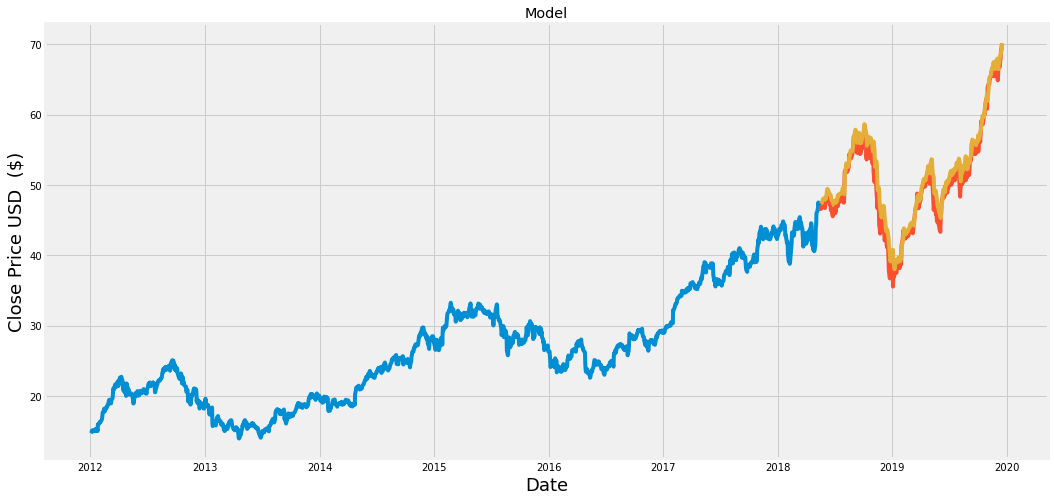

In [117]:
 
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD  ($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','val','predictions'], loc='lower right ')
plt.show()

In [119]:
#Show the valid & predicted Price

In [120]:
valid

,Close,Predictions
Date,,
2018-05-17,46.747501,47.377068
2018-05-18,46.577499,47.417492
2018-05-21,46.907501,47.413021
2018-05-22,46.790001,47.575947
2018-05-23,47.090000,47.694939
...,...,...
2019-12-11,67.692497,68.327438
2019-12-12,67.864998,68.555283
2019-12-13,68.787498,68.753807


**Get the quote**

In [121]:
apple_quote = web.DataReader('AAPL',data_source='yahoo',start='2012-01-01',end='2019-12-17')

In [122]:
#create a new DataFrame

In [124]:
new_df = apple_quote.filter(['Close'])

In [125]:
#GET THE LAST 60 DAYS CLOSING PRICE VALUES AND CONVERT THE DATA FRAME TO AN ARRAY 

In [126]:
last_60_days = new_df[-60:].values

In [127]:
#Scale the data to be values between 0 & 1

In [128]:
last_60_days_scaled = scaler.transform(last_60_days)

In [129]:
#create an empty list 

In [130]:
X_test=[]
#append the past 60 days 
X_test.append(last_60_days_scaled)

In [131]:
#X_test dataset convert to numpy array 

In [132]:
X_test = np.array(X_test)

In [133]:
#Reshape Data 

In [135]:
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [136]:
#Get the predicted scaled Price 

In [137]:
pred_price = model.predict(X_test)


In [138]:
#Undo the scaling 

In [139]:
pred_prie = scaler.inverse_transform(pred_price)

In [140]:
print(pred_price)

[[1.0109346]]


In [141]:
#Get the quote 

In [143]:
apple_quote_2 = web.DataReader ('AAPL',data_source ='yahoo',start = '2019-12-18',end='2019-12-18')

In [144]:
print(apple_quote_2['Close'])

Date
2019-12-17    70.102501
2019-12-18    69.934998
Name: Close, dtype: float64
